In [2]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import chart_studio.plotly as py
import plotly.graph_objects as go

In [2]:
#pytrends = TrendReq(hl='en-US', tz=360)
term = ['coronavirus']

In [18]:
statelist = ['US-AL',
'US-AK',
'US-AZ',
'US-AR',
'US-CA',
'US-CO',
'US-CT',
'US-DE',
'US-FL',
'US-GA',
'US-HI',
'US-ID',
'US-IL',
'US-IN',
'US-IA',
'US-KS',
'US-KY',
'US-LA',
'US-ME',
'US-MD',
'US-MA',
'US-MI',
'US-MN',
'US-MS',
'US-MO',
'US-MT',
'US-NE',
'US-NV',
'US-NH',
'US-NJ',
'US-NM',
'US-NY',
'US-NC',
'US-ND',
'US-OH',
'US-OK',
'US-OR',
'US-PA',
'US-RI',
'US-SC',
'US-SD',
'US-TN',
'US-TX',
'US-UT',
'US-VT',
'US-VA',
'US-WA',
'US-WV',
'US-WI',
'US-WY',
'US-DC',
'US-AS',
'US-GU',
'US-MP',
'US-PR',
'US-UM',
'US-VI']

In [19]:
#df = pd.DataFrame()
#for elem in statelist: 
#    query_dec = pytrends.get_historical_interest(term, year_start=2019, month_start=12, day_start=1, hour_start=0, year_end=2019, month_end=12, day_end=31, hour_end=23, cat=0, geo=elem, gprop='', sleep=60)
#    query_jan = pytrends.get_historical_interest(term, year_start=2020, month_start=1, day_start=1, hour_start=0, year_end=2020, month_end=1, day_end=31, hour_end=23, cat=0, geo=elem, gprop='', sleep=60)
#    query_feb = pytrends.get_historical_interest(term, year_start=2020, month_start=2, day_start=1, hour_start=0, year_end=2020, month_end=2, day_end=29, hour_end=23, cat=0, geo=elem, gprop='', sleep=60)
#    query = pd.concat([query_dec, query_jan, query_feb])
#    query['state'] = elem
#    filename = elem + '.csv'
#    query.to_csv(filename)
#    df = df.append(query)

HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /trends/api/explore?hl=en-US&tz=360&req=%7B%22comparisonItem%22%3A+%5B%7B%22keyword%22%3A+%22coronavirus%22%2C+%22time%22%3A+%222019-12-08T00+2019-12-15T00%22%2C+%22geo%22%3A+%22US-MD%22%7D%5D%2C+%22category%22%3A+0%2C+%22property%22%3A+%22%22%7D (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x122f1ba10>, 'Connection to trends.google.com timed out. (connect timeout=2)'))
HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /trends/api/explore?hl=en-US&tz=360&req=%7B%22comparisonItem%22%3A+%5B%7B%22keyword%22%3A+%22coronavirus%22%2C+%22time%22%3A+%222019-12-22T00+2019-12-29T00%22%2C+%22geo%22%3A+%22US-MD%22%7D%5D%2C+%22category%22%3A+0%2C+%22property%22%3A+%22%22%7D (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x12158fc10>, 'Connection to trends.google.com timed out. (connect timeout=2)')

/Users/bakinero/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The request failed: Google returned a response with code 400.
The requ

In [3]:
#df.to_csv('query_dataset.csv')
#usa.to_csv('us_aggregate_dataset.csv')
df = pd.read_csv('query_dataset.csv', dtype= {'results': int, 'state': str,'day': str, 'timestamp': str})
usa = pd.read_csv('us_aggregate_dataset.csv', dtype = {'results': int, 'day': str,  'timestamp': str})

usa.timestamp = usa.timestamp.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df.timestamp = df.timestamp.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [4]:
#df = df.drop(columns = 'isPartial')
#df = df.rename(columns = {'coronavirus': 'results'})
#df = df.rename(columns = {'Unnamed: 0': 'timestamp'})
#df.timestamp = df.timestamp.map(lambda x: pd.to_datetime(x))
#df['day'] = None
df['day'] = df.timestamp.map(lambda x: str(x.year) + str(x.month) + str(x.day)  if len(str(x.day)) > 1 else str(x.year) + str(x.month) + str(0) + str(x.day)) 
df['day'] = df.timestamp.map(lambda x: str(x.year) + str(x.month) + str(x.day)  if len(str(x.month)) > 1 else str(x.year) + str(0) + str(x.month) + str(x.day)) 
df.day = df.day.map(lambda x: x.replace('20','',1)[:2] + '/' + x[4:6] + '/' + x[6:8])

In [5]:
#usa = pd.DataFrame()
#usa['results'] = None
#usa['results'] = df.groupby('timestamp').results.sum()
#usa['timestamp'] = None
#usa['timestamp'] = df.timestamp.unique()
#usa['day'] = None
usa['day'] = usa.timestamp.map(lambda x: str(x.year) + str(x.month) + str(x.day)  if len(str(x.day)) > 1 else str(x.year) + str(x.month) + str(0) + str(x.day))
usa['day'] = usa.timestamp.map(lambda x: str(x.year) + str(x.month) + str(x.day)  if len(str(x.month)) > 1 else str(x.year)+ str(0) + str(x.month) + str(x.day))
usa.day = usa.day.map(lambda x: x.replace('20','',1)[:2] + '/' + x[4:6] + '/' + x[6:8])

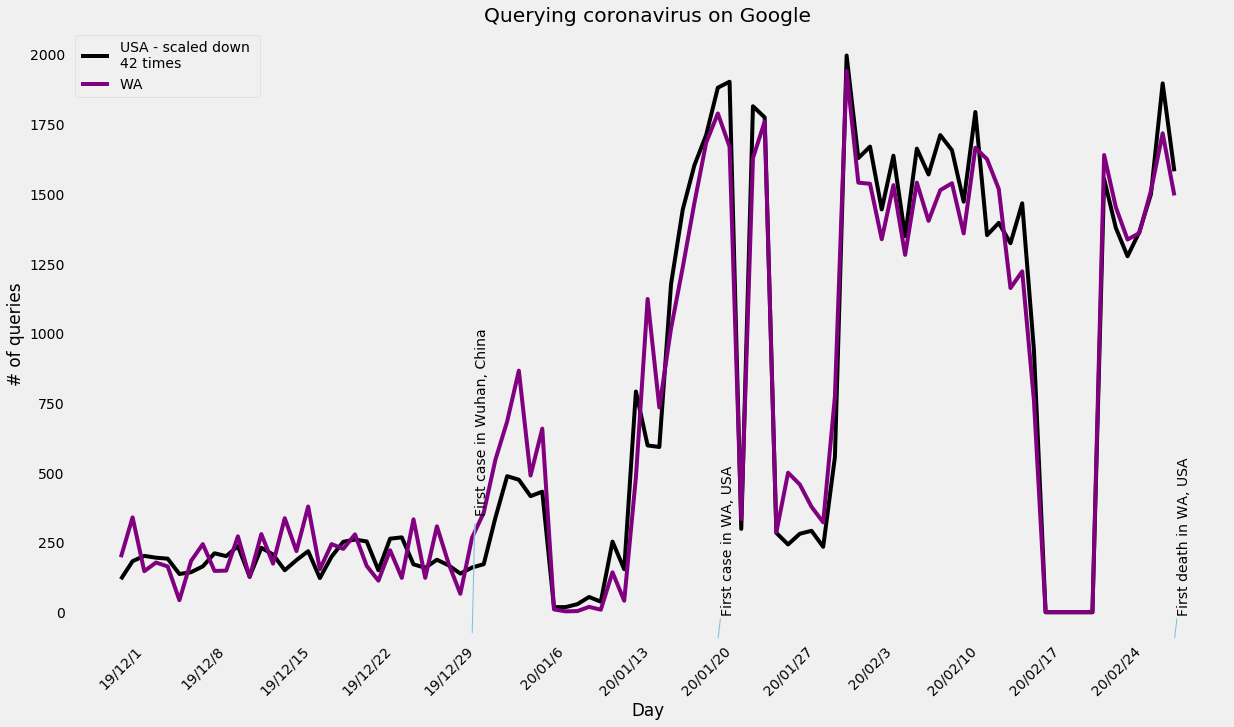

In [8]:
# matplotlib graphs - feel free to ignore
#title = 'Querying coronavirus on Google'

#scale = usa.results.sum() / df[df.state == 'US-WA'].results.sum()
#y1 = usa.groupby('day').results.sum() / scale
#x1 = usa.day.unique()
#name1 = 'USA - scaled down \n' + str(int(scale)) + ' times'

#y2 = df[df.state == 'US-WA'].groupby('day').results.sum()
#x2 = df.day.unique()
#name2 = 'WA'

#y3 = df[df.state == 'US-CA'].groupby('day').results.sum()
#x3 = df.day.unique()
#name3 = 'CA'

#fig, ax = plt.subplots()
#ax.plot(x1, y1, color = 'black', label =  name1)  
#ax.plot(x2, y2, color = 'purple', label =  name2)  
 
#ymin, ymax = plt.ylim()
#arrowprops = {'width': 1, 'headwidth': 1, 'headlength': 1, 'shrink':0.05 }

#ax.annotate('First case in Wuhan, China', xy=('19/12/31', ymin), xytext=(10, 125), textcoords='offset points',
#             rotation=90, va='bottom', ha='center', annotation_clip=False, arrowprops=arrowprops)

#ax.annotate('First case in WA, USA', xy=('20/01/21', ymin), xytext=(10, 25), textcoords='offset points',
#             rotation=90, va='bottom', ha='center', annotation_clip=False, arrowprops=arrowprops)

#ax.annotate('First death in WA, USA', xy=('20/02/29', ymin), xytext=(10, 25), textcoords='offset points',
#             rotation=90, va='bottom', ha='center', annotation_clip=False, arrowprops=arrowprops)

#ax.set(xlabel = 'Day', ylabel= '# of queries', title = title)
#ax.legend()    
#ax.grid()
#fig.set_size_inches(18.5, 10.5)
#plt.style.use('fivethirtyeight')
#ax.set_xticks(['19/12/1', '19/12/8','19/12/15','19/12/22','19/12/29','20/01/6','20/01/13', '20/01/20', '20/01/27', 
#               '20/02/3', '20/02/10', '20/02/17', '20/02/24'])
#plt.xticks(rotation=45)
#plt.show()

In [49]:
scale = usa.results.sum() / df[df.state == 'US-WA'].results.sum()

x = df.day.unique()
y0 = df[df.state == 'US-WA'].groupby('day').results.sum()
y1 = df[df.state == 'US-CA'].groupby('day').results.sum()
y2 = df[df.state == 'US-NY'].groupby('day').results.sum()
y3 = usa.groupby('day').results.sum()/ scale


# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x,
        y=y0,      
        marker=dict(color="Purple"),
        name = 'WA'
    )
)

fig.add_trace(
    go.Scatter(
        x=x,
        y=y1,
        marker=dict(color= "Blue"),
        name = 'CA'
    )
)

fig.add_trace(
    go.Scatter(
        x=x,
        y=y2,
        marker=dict(color="Green"),
        name = 'NY'
    )
)

fig.add_trace(
    go.Scatter(
        x=x,
        y=y3,
        marker=dict(color="Black"),
        name = 'USA'
    )
)

fig.update_layout(
    title_text= "Coronavirus search on Google",
    showlegend= True,

        
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85],
        ticktext = ['19/12/1', '19/12/8','19/12/15','19/12/22','19/12/29','20/01/6','20/01/13', '20/01/20', '20/01/27', 
               '20/02/3', '20/02/10', '20/02/17', '20/02/24']
    ),
    
    annotations=[
        dict(text= 'First case in Wuhan, China', showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12
            ), textangle=-45,
                             x='19/12/31', y=1, yref="paper", align="left"),
        dict(text= 'First case in WA, USA', showarrow=True,
             font=dict(
            family="Courier New, monospace",
            size=12
            ), textangle=-45,
                             x='20/01/21', y=1, yref="paper", align="left"),
        dict(text= 'First death in WA, USA', showarrow=True,
             font=dict(
            family="Courier New, monospace",
            size=12
            ),textangle=-45,
                             x='20/02/29', y=1, yref="paper", align="left")
    ],
      
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="All USA",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Search results in all US"}]),
                dict(label="WA",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Search results in WA"}]),
                dict(label="CA",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Search results in CA"}]),
                dict(label="NY",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Search results in NY"}]),
                dict(label="WA, CA, NY",
                     method="update",
                     args=[{"visible": [True, True, True, False]},
                           {"title": "Search results in WA, CA, NY"}]),
                dict(label="USA (normalized) compared to WA",
                     method="update",
                     args=[{"visible": [True, False, False, True]},
                           {"title": "USA (normalized) compared to WA"}])
            ]
        )
    ]
)

fig.show()